# Problem 2

In [ ]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.optimize import fminbound
import scipy.optimize as opt
import numba

# to print plots inline
%matplotlib inline

In [2]:
beta = 0.96
gamma = 0.50
delta =  0.05
alpha = 0.4
mean_shock = 0.0
sigma_shock = 0.20

'''
------------------------------------------------------------------------
Create Grid for State Space    
------------------------------------------------------------------------
lb_k      = scalar, lower bound of capital(k) grid
ub_k      = scalar, upper bound of capital(k) grid 
size_k    = integer, number of grid points in kapital state space
k_grid    = vector, size_w x 1 vector of cake grid points 
------------------------------------------------------------------------
'''
lb_k = .1
ub_k = 20.0 
size_k = 500  # Number of grid points for capital grid
size_eps = 100 # Number of grid points for shock grid
k_grid = np.linspace(lb_k, ub_k, size_k)
shock_grid =  np.exp(mean_shock + sigma_shock* np.random.randn(size_eps))

In [3]:
def utility(C,gamma):
    U = (C ** (1 - gamma)) / (1 - gamma)
    return U  

In [4]:
''' Create a three dimesional utility array with dimensions for k,k' and z.
Once the utility has been calculated at each of the value in this array. 
Take a mean value in the z dimension to get a 2-D array for Expected utility
'''
C =  np.zeros((size_k, size_k, size_eps))

@numba.jit
def C_loop(size_k,size_eps,delta,k_grid,shock_grid,alpha):
    for i in range(size_k): # loop over k
        for j in range(size_k): # loop over k'
            for s in range(size_eps): #loop over z shock
                C[i,j,s] =   (1-delta)*k_grid[i] + shock_grid[s]*k_grid[i]**alpha-k_grid[j]

    return C

C =  C_loop(size_k,size_eps,delta,k_grid,shock_grid,alpha)
C[C<0] = 1e-6
U = utility(C,gamma) 
U[C == 1e-6] = -1e6

EU = np.mean(U, axis =2)

# Value Function Iteration

In [5]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
VFtol     = scalar, tolerance required for value function to converge
VFdist    = scalar, distance between last two value functions
VFmaxiter = integer, maximum number of iterations for value function
V         = vector, the value functions at each iteration
Vmat      = matrix, the value for each possible combination of k and k'
Vstore    = matrix, stores V at each iteration 
VFiter    = integer, current iteration number
TV        = vector, the value function after applying the Bellman operator
PF        = vector, indicies of choices of k' for all k 
VF        = vector, the "true" value function
------------------------------------------------------------------------
'''
VFtol = 1e-8
VFdist = 7.0 
VFmaxiter = 5000 
V = np.zeros(size_k) # initial guess at value function
Vmat = np.zeros((size_k, size_k)) # initialize Vmat matrix
Vstore = np.zeros((size_k, VFmaxiter)) #initialize Vstore array
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:
    @numba.jit
    def VFI_loop(size_k,Vmat,EU,beta,V):
        for i in range(size_k): # loop over k
            for j in range(size_k): # loop over k'
                Vmat[i, j] = EU[i, j] + beta * V[j] 
        return Vmat

    Vmat =  VFI_loop(size_k,Vmat,EU,beta,V)
    Vstore[:, VFiter] = V.reshape(size_k,) # store value function at each iteration for graphing later
    TV = Vmat.max(1) # apply max operator to Vmat (to get V(w))
    PF = np.argmax(Vmat, axis=1)
    VFdist = (np.absolute(V - TV)).max()  # check distance
    print("Iteration ", VFiter, "dist =", VFdist)
    V = TV
    VFiter += 1 
    
if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

Iteration  1 dist = 9.433342682334352
Iteration  2 dist = 4.227208352153198
Iteration  3 dist = 3.3948823570603395
Iteration  4 dist = 2.9620121572364084
Iteration  5 dist = 2.678171541136358
Iteration  6 dist = 2.4681986651254064
Iteration  7 dist = 2.3009296692847805
Iteration  8 dist = 2.1609898040188433
Iteration  9 dist = 2.039859181738489
Iteration  10 dist = 1.9324130132648492
Iteration  11 dist = 1.8354609089323688
Iteration  12 dist = 1.7467599961504803
Iteration  13 dist = 1.664975589196537
Iteration  14 dist = 1.5888040422545373
Iteration  15 dist = 1.5176092028337393
Iteration  16 dist = 1.4506176960102266
Iteration  17 dist = 1.3874985207179833
Iteration  18 dist = 1.327818158410203
Iteration  19 dist = 1.2712291372048057
Iteration  20 dist = 1.2174653802686208
Iteration  21 dist = 1.1663475757231865
Iteration  22 dist = 1.1176705838382475
Iteration  23 dist = 1.0712092365534716
Iteration  24 dist = 1.0269857154677027
Iteration  25 dist = 0.9846227931583016
Iteration  26 d

Iteration  198 dist = 0.000835423667666646
Iteration  199 dist = 0.0008020067209457693
Iteration  200 dist = 0.0007699264521079385
Iteration  201 dist = 0.0007391293940344212
Iteration  202 dist = 0.0007095642182690653
Iteration  203 dist = 0.000681181649540008
Iteration  204 dist = 0.0006539343835640921
Iteration  205 dist = 0.0006277770082192546
Iteration  206 dist = 0.0006026659279001478
Iteration  207 dist = 0.0005785592907869841
Iteration  208 dist = 0.0005554169191555047
Iteration  209 dist = 0.0005332002424012217
Iteration  210 dist = 0.0005118722327068781
Iteration  211 dist = 0.0004913973434099717
Iteration  212 dist = 0.0004717414496724359
Iteration  213 dist = 0.000452871791694065
Iteration  214 dist = 0.00043475692002914457
Iteration  215 dist = 0.0004173666432336631
Iteration  216 dist = 0.00040067197750204286
Iteration  217 dist = 0.00038464509840707706
Iteration  218 dist = 0.0003692592944730677
Iteration  219 dist = 0.0003544889226958503
Iteration  220 dist = 0.00034030

Iteration  383 dist = 4.3861646759069117e-07
Iteration  384 dist = 4.2107181741357635e-07
Iteration  385 dist = 4.0422894187486236e-07
Iteration  386 dist = 3.8805978874734137e-07
Iteration  387 dist = 3.7253740003961866e-07
Iteration  388 dist = 3.5763591199611255e-07
Iteration  389 dist = 3.433304840427809e-07
Iteration  390 dist = 3.295972419437021e-07
Iteration  391 dist = 3.164133630662036e-07
Iteration  392 dist = 3.0375683479633153e-07
Iteration  393 dist = 2.916065540148338e-07
Iteration  394 dist = 2.7994229867545073e-07
Iteration  395 dist = 2.6874461411807715e-07
Iteration  396 dist = 2.5799484149047203e-07
Iteration  397 dist = 2.4767504669398477e-07
Iteration  398 dist = 2.377680488052647e-07
Iteration  399 dist = 2.2825733481113275e-07
Iteration  400 dist = 2.1912703118687205e-07
Iteration  401 dist = 2.1036196073964675e-07
Iteration  402 dist = 2.0194747207824548e-07
Iteration  403 dist = 1.938695817216285e-07
Iteration  404 dist = 1.8611480356867105e-07
Iteration  405 d

# Extract Decision Rule from Solution

In [6]:
'''Optimal Choice of c and k'''
optk = k_grid[PF]
optc = (1-delta)*k_grid + np.mean(shock_grid)*k_grid**alpha-optk

# Visualize Output

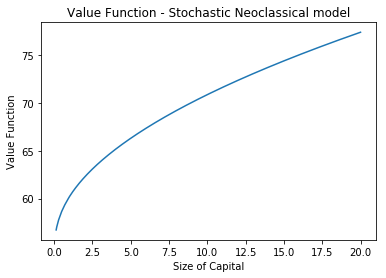

In [7]:
# Plot value function 
plt.figure()
plt.plot(k_grid[1:], VF[1:])
plt.xlabel('Size of Capital')
plt.ylabel('Value Function')
plt.title('Value Function - Stochastic Neoclassical model')
plt.show()

<Figure size 432x288 with 0 Axes>

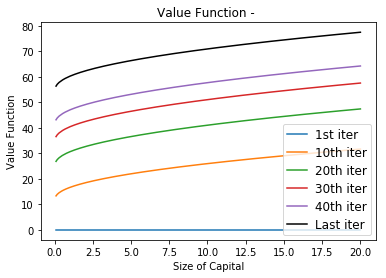

In [8]:
# Plot value function at several iterations
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid, Vstore[:,0], label='1st iter')
ax.plot(k_grid, Vstore[:,10], label='10th iter')
ax.plot(k_grid, Vstore[:,20], label='20th iter')
ax.plot(k_grid, Vstore[:,30], label='30th iter')
ax.plot(k_grid, Vstore[:,40], label='40th iter')
ax.plot(k_grid, Vstore[:,VFiter-1], 'k', label='Last iter')
# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital')
plt.ylabel('Value Function')
plt.title('Value Function - ')
plt.show()

<Figure size 432x288 with 0 Axes>

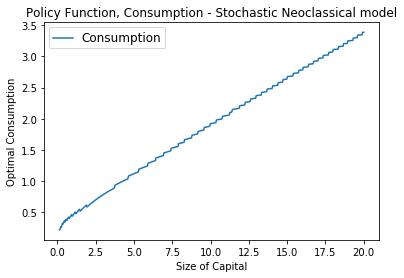

In [9]:
#Plot optimal consumption rule as a function of captal
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[1:], optc[1:], label='Consumption')
# Now add the legend with some customizations.
legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital')
plt.ylabel('Optimal Consumption')
plt.title('Policy Function, Consumption - Stochastic Neoclassical model')
plt.show()

<Figure size 432x288 with 0 Axes>

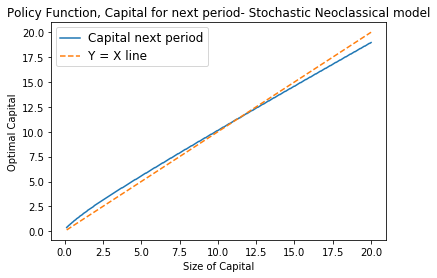

In [10]:
#Plot optimal capital next period rule as a function of cake size
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[1:], optk[1:], label='Capital next period')
ax.plot(k_grid[1:], k_grid[1:], '--', label='Y = X line')
# Now add the legend with some customizations.
legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital')
plt.ylabel('Optimal Capital')
plt.title('Policy Function, Capital for next period- Stochastic Neoclassical model')
plt.show()

# Problem 3

In [13]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.optimize import fminbound
import scipy.optimize as opt
import numba
import ar1_approx as ar1

# to print plots inline
%matplotlib inline

In [14]:
beta = 0.96
gamma = 0.50
delta =  0.05
alpha = 0.4
mu = 0.0
rho = 0.8
sigma_v = 0.10

'''
------------------------------------------------------------------------
Create Grid for State Space    
------------------------------------------------------------------------
lb_k      = scalar, lower bound of capital(k) grid
ub_k      = scalar, upper bound of capital(k) grid 
size_k    = integer, number of grid points in kapital state space
k_grid    = vector, size_w x 1 vector of cake grid points 
------------------------------------------------------------------------
'''
lb_k = 10.0
ub_k = 20.0 
size_k = 50  # Number of grid points for capital grid
size_eps = 50 # Number of grid points for shock grid
k_grid = np.linspace(lb_k, ub_k, size_k)
# Use the Adda Cooper method suggested by Jason
shock_z, trans_p =  ar1.addacooper(size_eps,mu, rho,sigma_v)
shock_grid = np.exp(shock_z)
prob = np.transpose(trans_p)

In [15]:
def utility(C,gamma):
    U = (C ** (1 - gamma)) / (1 - gamma)
    return U  

In [16]:
''' Create a three dimesional utility array with dimensions for k,k' and z.
Once the utility has been calculated at each of the value in this array. 
Take a mean value in the z dimension to get a 2-D array for Expected utility
'''
C =  np.zeros((size_k, size_k, size_eps))

@numba.jit
def C_loop(size_k,size_eps,delta,k_grid,shock_grid,alpha):
    for i in range(size_k): # loop over k
        for j in range(size_k): # loop over k'
            for s in range(size_eps): #loop over z shock
                C[i,j,s] =   (1-delta)*k_grid[i] + shock_grid[s]*k_grid[i]**alpha-k_grid[j]

    return C

C =  C_loop(size_k,size_eps,delta,k_grid,shock_grid,alpha)
C[C<0] = 1e-6
U = utility(C,gamma) 
U[C == 1e-6] = -1e6

# Value Function Iteration

In [17]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
VFtol     = scalar, tolerance required for value function to converge
VFdist    = scalar, distance between last two value functions
VFmaxiter = integer, maximum number of iterations for value function
V         = vector, the value functions at each iteration
Vmat      = matrix, the value for each possible combination of k , k, and shock'
Vstore    = matrix, stores V at each iteration 
VFiter    = integer, current iteration number
TV        = vector, the value function after applying the Bellman operator
PF        = vector, indicies of choices of k' for all k 
VF        = vector, the "true" value function
------------------------------------------------------------------------
'''
VFtol = 1e-8
VFdist = 7.0 
VFmaxiter = 5000 
V = np.zeros((size_k,size_eps) )# initial guess at value function
Vmat = np.zeros((size_k, size_k,size_eps)) # initialize Vmat matrix
Vstore = np.zeros((size_k,size_eps, VFmaxiter)) #initialize Vstore array
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:
    @numba.jit
    def VFI_loop(size_k,Vmat,beta,V,size_eps,prob,U):
        for i in range(size_k): # loop over k
            for j in range(size_k): # loop over k'
                for s in range(size_eps):
                    EU = 0
                    for ss in range(size_eps):
                        EU += prob[s, ss]*V[j, ss]
                        Vmat[i, j,s] = U[i, j,s] + beta * EU
        return Vmat
    Vmat =  VFI_loop(size_k,Vmat,beta,V,size_eps,prob,U)
    Vstore[:,:, VFiter] = V.reshape(size_k,size_eps,) # store value function at each iteration for graphing later
    TV = Vmat.max(1) # apply max operator to Vmat (to get V(k))
    PF = np.argmax(Vmat, axis=1)
    VFdist = (np.absolute(V - TV)).max()  # check distance
    print("Iteration ", VFiter, "dist =", VFdist)
    V = TV
    VFiter += 1 
    
if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

Iteration  1 dist = 7.4731101019519794
Iteration  2 dist = 4.050949850985132
Iteration  3 dist = 3.493882014658979
Iteration  4 dist = 3.1579929163329545
Iteration  5 dist = 2.9085117435747208
Iteration  6 dist = 2.7058839631289366
Iteration  7 dist = 2.5337810932437783
Iteration  8 dist = 2.3846475493144332
Iteration  9 dist = 2.252052342333595
Iteration  10 dist = 2.1325791725147667
Iteration  11 dist = 2.0245356950449676
Iteration  12 dist = 1.9248859529957727
Iteration  13 dist = 1.8330766359810298
Iteration  14 dist = 1.7478884667598606
Iteration  15 dist = 1.668552448931095
Iteration  16 dist = 1.5943362279142832
Iteration  17 dist = 1.5245912114130178
Iteration  18 dist = 1.45884291741514
Iteration  19 dist = 1.3967088106341379
Iteration  20 dist = 1.337808273933497
Iteration  21 dist = 1.2818544476159133
Iteration  22 dist = 1.2286071726242298
Iteration  23 dist = 1.1778685933510218
Iteration  24 dist = 1.1294628430662996
Iteration  25 dist = 1.0832379237431624
Iteration  26 di

Iteration  198 dist = 0.0009229139111539553
Iteration  199 dist = 0.0008859973547288291
Iteration  200 dist = 0.0008505574605521815
Iteration  201 dist = 0.0008165351621158834
Iteration  202 dist = 0.0007838737556085107
Iteration  203 dist = 0.0007525188053847387
Iteration  204 dist = 0.0007224180531864022
Iteration  205 dist = 0.0006935213310867994
Iteration  206 dist = 0.0006657804778313903
Iteration  207 dist = 0.0006391492587312086
Iteration  208 dist = 0.000613583288384234
Iteration  209 dist = 0.0005890399568215798
Iteration  210 dist = 0.0005654783586095391
Iteration  211 dist = 0.0005428592242253671
Iteration  212 dist = 0.0005211448552699949
Iteration  213 dist = 0.0005002990610734059
Iteration  214 dist = 0.0004802870986253538
Iteration  215 dist = 0.00046107561468033964
Iteration  216 dist = 0.00044263259010790534
Iteration  217 dist = 0.0004249272865166631
Iteration  218 dist = 0.00040793019503837513
Iteration  219 dist = 0.00039161298724366134
Iteration  220 dist = 0.00037

Iteration  384 dist = 4.651688669810028e-07
Iteration  385 dist = 4.4656215436589264e-07
Iteration  386 dist = 4.286996500013629e-07
Iteration  387 dist = 4.1155168162276823e-07
Iteration  388 dist = 3.9508957172529335e-07
Iteration  389 dist = 3.7928599283532094e-07
Iteration  390 dist = 3.6411455539564486e-07
Iteration  391 dist = 3.495500067174362e-07
Iteration  392 dist = 3.355679893957131e-07
Iteration  393 dist = 3.221452828938709e-07
Iteration  394 dist = 3.0925947669402376e-07
Iteration  395 dist = 2.96889098194697e-07
Iteration  396 dist = 2.8501354165655357e-07
Iteration  397 dist = 2.736129971481205e-07
Iteration  398 dist = 2.6266847896749823e-07
Iteration  399 dist = 2.521617545880872e-07
Iteration  400 dist = 2.4207528781516885e-07
Iteration  401 dist = 2.323922814184698e-07
Iteration  402 dist = 2.2309659186703357e-07
Iteration  403 dist = 2.141727293292206e-07
Iteration  404 dist = 2.056058292509988e-07
Iteration  405 dist = 1.9738160972337937e-07
Iteration  406 dist = 

# Extract Decision Rules From Solution

In [22]:
'''Optimal Choice of k for next period and c'''
optk = k_grid[PF]
optc = (1-delta)*k_grid + shock_grid*k_grid**alpha- optk

<Figure size 432x288 with 0 Axes>

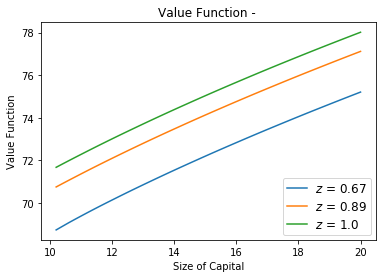

In [23]:
# Plot value function at several iterations
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[1:], VF[1:, 0], label='$z$ = ' + str(round(shock_grid[0],2)))
ax.plot(k_grid[1:], VF[1:, 12], label='$z$ = ' + str(round(shock_grid[12],2)))
ax.plot(k_grid[1:], VF[1:, 25], label='$z$ = ' + str(round(shock_grid[25],2)))
# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital')
plt.ylabel('Value Function')
plt.title('Value Function - ')
plt.show()

<Figure size 432x288 with 0 Axes>

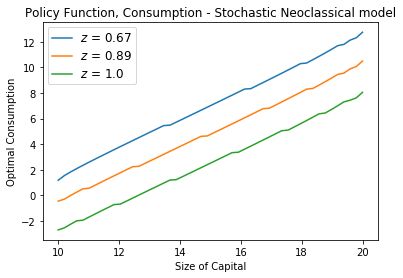

In [24]:
#Plot optimal consumption rule as a function of captal
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optc[:][0], label='$z$ = ' + str(round(shock_grid[0],2)))
ax.plot(k_grid[:], optc[:][12], label='$z$ = ' + str(round(shock_grid[12],2)))
ax.plot(k_grid[:], optc[:][25], label='$z$ = ' + str(round(shock_grid[25],2)))
# Now add the legend with some customizations.
legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital')
plt.ylabel('Optimal Consumption')
plt.title('Policy Function, Consumption - Stochastic Neoclassical model')
plt.show()

<Figure size 432x288 with 0 Axes>

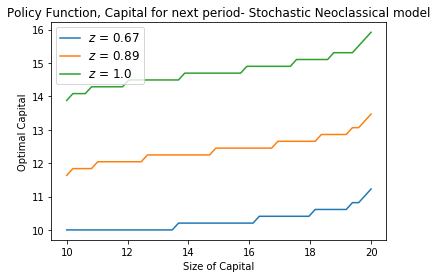

In [25]:
#Plot optimal capital next period rule as a function of cake size
plt.figure()
fig, ax = plt.subplots()
#ax.plot(k_grid[1:], optk[1:], label='Capital next period')
#ax.plot(k_grid[1:], k_grid[1:], '--', label='Y = X line')
ax.plot(k_grid[:], optk[:][0], label='$z$ = ' + str(round(shock_grid[0],2)))
ax.plot(k_grid[:], optk[:][12], label='$z$ = ' + str(round(shock_grid[12],2)))
ax.plot(k_grid[:], optk[:][25], label='$z$ = ' + str(round(shock_grid[25],2)))
# Now add the legend with some customizations.
legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital')
plt.ylabel('Optimal Capital')
plt.title('Policy Function, Capital for next period- Stochastic Neoclassical model')
plt.show()

# Problem 4

In [28]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import ar1_approx as ar1
# to print plots inline
%matplotlib inline

In [29]:
# Declare parameters
# Preference parameters
beta = 0.96
#size_eps = 40  # number of grid points in epsilon-space
size_b = 50
b = np.linspace(.05, 1, size_b)
mu_eps = 0
rho_eps = 0.0
sigma_v = 0.15


'''
------------------------------------------------------------------------
Create Grid for State Space    
------------------------------------------------------------------------
ub_wa      = scalar, upper bound of wage grid 
size_wa    = integer, number of grid points in wage state space
wa_grid    = vector, size_w x 1 vector of wage grid points 
------------------------------------------------------------------------
'''

size_wa = 75  # Number of grid points


'''
Create grid of taste shocks
'''
import ar1_approx as ar1
ln_eps_grid, pi_t = ar1.addacooper(size_wa, mu_eps, rho_eps, sigma_v)
wa_grid = np.exp(ln_eps_grid)
prob = np.transpose(pi_t)
u =  wa_grid/(1-beta)

In [30]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
VFtol       = scalar, tolerance required for value function to converge
VFdist      = scalar, distance between last two value functions
VFmaxiter   = integer, maximum number of iterations for value function
V           = matrix, the value functions at each iteration
TV          = matrix, the value function after applying the Bellman operator
PF_discrete = matrix, matrix of policy function: eat=1, not eat=0 
Vstore      = array, stores V at each iteration 
VFiter      = integer, current iteration number
EV          = scalar, expected value function for a given state
U_eat       = matrix, utility from eating cake now
Vwait       = matrix, value of waiting to eat the cake
VF          = vector, the "true" value function
------------------------------------------------------------------------
'''
VFtol = 1e-8 
VFdist = 7.0 
VFmaxiter = 5000 
V = np.zeros((size_wa,size_b)) # initial guess at value function
TV = np.zeros((size_wa,size_b))
PF_discrete = np.zeros((size_wa,size_b))
Vstore = np.zeros(( size_wa, size_b,VFmaxiter)) #initialize Vstore array
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:
    for i in range(size_wa): # loop over wage
        for j, b_val in enumerate(b):
            EU = 0
            for ii in range(size_wa):  # loop over epsilon'
                EU += prob[i, ii] * V[ii,j]   # note can move one space because of how we constructed grid
            U_emp = u[i]
            Vwait = b_val + beta * EU 
            TV[i,j] = max(U_emp, Vwait)
            PF_discrete[i,j] = U_emp >= Vwait  # = 1 if accept the present wage offer
            
    Vstore[:,:, VFiter] = TV # store value function at each iteration for graphing later 
    VFdist = (np.absolute(V - TV)).max()  # check distance
    V = TV
    VFiter += 1 

if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

Value function converged after this many iterations: 3


In [31]:
'''
------------------------------------------------------------------------
Find threshold policy functions   
------------------------------------------------------------------------
'''
threshold_wa = wa_grid[np.argmax(PF_discrete, axis=0)]

<Figure size 432x288 with 0 Axes>

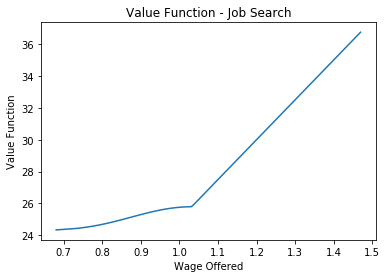

In [32]:
# Plot value function 
plt.figure()
fig, ax = plt.subplots()
ax.plot(wa_grid[:], VF[:,1])
plt.xlabel('Wage Offered')
plt.ylabel('Value Function')
plt.title('Value Function - Job Search')
plt.show()

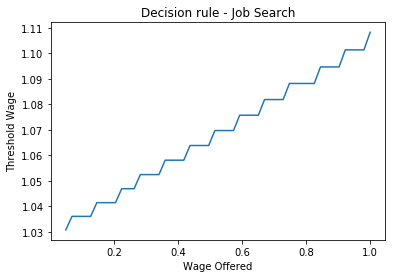

In [33]:
# Plot threshold
plt.figure()
plt.plot(b[:], threshold_wa[:])
plt.xlabel('Wage Offered')
plt.ylabel('Threshold Wage')
plt.title('Decision rule - Job Search')
plt.show()